In [20]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from pathlib import Path
home_dir = str(Path.home())
work_dir = os.path.join(home_dir, 'Box/CogNeuroLab/Aging Decision Making R01')

## Brain Connectivity Toolbox Metrics

TO DO:
1. Average metrics across graph thresholds

In [128]:
thresh_range = [1, 15, 2, 25]

In [156]:
bct[:,:,1:].shape

(44, 15, 4)

In [157]:
bct = np.zeros((44,15))
for thresh in thresh_range:
    bct_th = np.load(os.path.join(work_dir, 'Analysis/REST/REST_bct_oa_thr_%s.npy' % thresh))
    print(bct_th.shape)
    bct = np.dstack((bct, bct_th))

bct = bct[:,:,1:]
print(bct.shape)

(44, 15)
(44, 15)
(44, 15)
(44, 15)
(44, 15, 4)


In [165]:
bct_oa = pd.DataFrame(bct.mean(axis=0).transpose(), columns = ('efficiency_global', 'clustering_coef', 'modularity', 'efficiency_local_mean', 'partic_coef_mean', \
                                                       'efficiency_global_dmn', 'clustering_coef_dmn', 'modularity_dmn', 'efficiency_local_dmn', 'partic_coef_dmn', \
                                                       'efficiency_global_fpn', 'clustering_coef_fpn', 'modularity_fpn', 'efficiency_local_fpn', 'partic_coef_fpn'))



,efficiency_global,clustering_coef,modularity,efficiency_local_mean,partic_coef_mean,efficiency_global_dmn,clustering_coef_dmn,modularity_dmn,efficiency_local_dmn,partic_coef_dmn,efficiency_global_fpn,clustering_coef_fpn,modularity_fpn,efficiency_local_fpn,partic_coef_fpn
0,0.366128,0.354204,0.322682,0.329339,0.276309,0.241773,0.641631,0.639116,0.635086,0.377031,0.378252,0.417104,0.710288,0.751343,0.737975
1,0.370841,0.388046,0.361078,0.356886,0.334238,0.306665,0.623270,0.621455,0.619134,0.336967,0.325927,0.356122,0.740202,0.779422,0.767522
2,0.369660,0.404896,0.387553,0.371407,0.366750,0.346013,0.598551,0.596974,0.594751,0.307274,0.290011,0.319756,0.759091,0.792183,0.783787
3,0.366252,0.413367,0.406062,0.379533,0.388455,0.374527,0.571601,0.571267,0.568271,0.282142,0.262575,0.284013,0.771219,0.801869,0.794402


In [167]:
oa_rest_ids = np.load(os.path.join(work_dir, 'Analysis/REST/REST_oa_list.npy'))
oa_rest_ids = oa_rest_ids.astype(np.int)

ya_rest_ids = np.load(os.path.join(work_dir, 'Analysis/REST/REST_ya_list.npy'))
ya_rest_ids = ya_rest_ids.astype(np.int)

rest_ids = np.concatenate((ya_rest_ids, oa_rest_ids))

bct_oa['record_id'] = oa_rest_ids
# bct_ya['record_id'] = ya_rest_ids

# bct = pd.concat((bct_ya, bct_oa))

In [168]:
bct_oa.describe()

,efficiency_global,clustering_coef,modularity,efficiency_local_mean,partic_coef_mean,efficiency_global_dmn,clustering_coef_dmn,modularity_dmn,efficiency_local_dmn,partic_coef_dmn,efficiency_global_fpn,clustering_coef_fpn,modularity_fpn,efficiency_local_fpn,partic_coef_fpn,record_id
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.366128,0.354204,0.322682,0.329339,0.276309,0.241773,0.641631,0.639116,0.635086,0.377031,0.378252,0.417104,0.710288,0.751343,0.737975,40623.386364
std,0.027989,0.024746,0.033095,0.009652,0.023528,0.023367,0.035428,0.033625,0.021476,0.054259,0.067235,0.077470,0.039518,0.041891,0.030756,154.325270
min,0.312857,0.295579,0.250324,0.315145,0.204681,0.172600,0.551707,0.567350,0.593898,0.264432,0.206992,0.230912,0.567080,0.599297,0.639257,40160.000000
25%,0.350080,0.339464,0.305115,0.322343,0.260931,0.227987,0.617222,0.617209,0.620314,0.343799,0.329182,0.384445,0.690906,0.736476,0.723585,40541.250000
50%,0.365661,0.356002,0.324351,0.328591,0.275499,0.241943,0.634951,0.638108,0.635865,0.384440,0.376673,0.416696,0.719649,0.763284,0.743077,40652.500000
75%,0.386517,0.367194,0.340152,0.334585,0.294495,0.256860,0.659833,0.658865,0.645788,0.418145,0.424264,0.476441,0.734152,0.780587,0.758709,40744.750000
max,0.426796,0.424316,0.423680,0.356791,0.320955,0.292651,0.726362,0.722010,0.695720,0.463942,0.487775,0.538521,0.773193,0.802367,0.777560,40803.000000


In [ ]:
# bct_ya.describe()

## Network Metric Correlations with Executive Function, Memory, and Circadian Measures
### Older Adults

In [121]:
ef = pd.read_csv(os.path.join(work_dir, 'Analysis/neuropsych/ef_zscores.csv'))

mem_oa = pd.read_csv(os.path.join(work_dir, 'Analysis/neuropsych/oa_neuropsych_zscores.csv'), usecols = ['record_id', 'Memory'])

In [122]:
cr = pd.read_csv(os.path.join(work_dir, 'Data/cr/nparact_2019-06-20.csv'))

In [204]:
data = pd.merge(ef[['record_id', 'ef_zscore']], mem_oa)
data = pd.merge(data, bct_oa)
data = pd.merge(data, cr)
data[:5]
corrdata = data.drop(columns=['record_id', 'L5_starttime', 'M10_starttime', 'L5_start_diff', 'M10_start_diff'])

**correlations p > 0.05 set to zero**


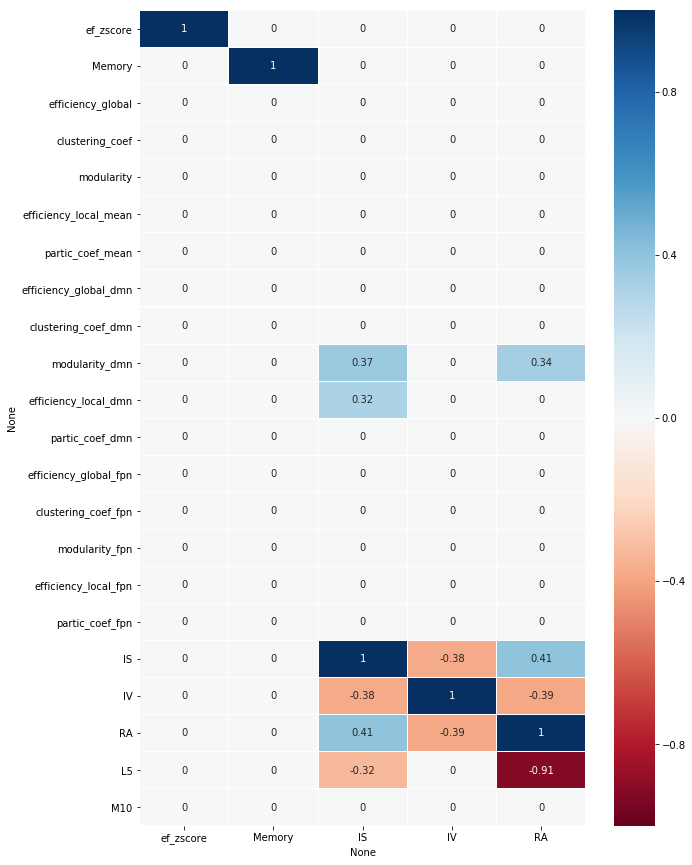

In [205]:
from scipy.stats import spearmanr

rho, pvalue = spearmanr(corrdata)

rho[np.where(pvalue>.05)] = 0
print('**correlations p > 0.05 set to zero**')
cormat = pd.DataFrame(rho, columns = [corrdata.columns], index = [corrdata.columns])
f, ax = plt.subplots(figsize =(10, 15)) 
sns.heatmap(cormat[['ef_zscore', 'Memory', 'IS', 'IV', 'RA']], ax = ax, cmap = 'RdBu', linewidths = 0.1, vmin=-1, annot=True) 

r = 0.314631, p = 0.048003, std error = 0.025233


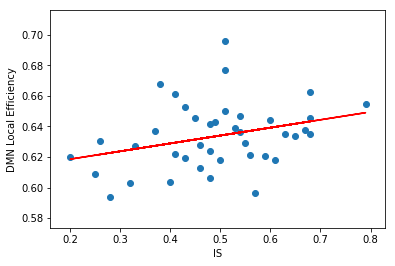

In [225]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(data['IS'], data['efficiency_local_dmn'])
line = slope*data['IS']+intercept

plt.scatter(data['IS'], data['efficiency_local_dmn'])
plt.plot(data['IS'], line, color='red')
plt.xlabel('IS')
plt.ylabel('DMN Local Efficiency')

print('r = %f, p = %f, std error = %f' % (r_value, p_value, std_err))

r = 0.382476, p = 0.014863, std error = 0.035332


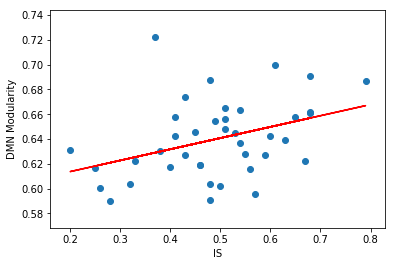

In [224]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(data['IS'], data['modularity_dmn'])
line = slope*data['IS']+intercept

plt.scatter(data['IS'], data['modularity_dmn'])
plt.plot(data['IS'], line, color='red')
plt.xlabel('IS')
plt.ylabel('DMN Modularity')

print('r = %f, p = %f, std error = %f' % (r_value, p_value, std_err))

r = 0.300764, p = 0.059321, std error = 0.041582


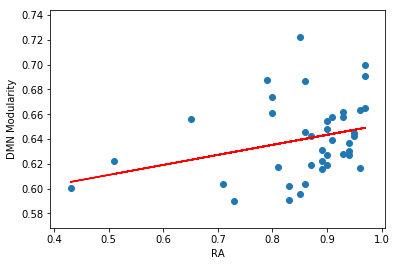

In [223]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(data['RA'], data['modularity_dmn'])
line = slope*data['RA']+intercept

plt.scatter(data['RA'], data['modularity_dmn'])
plt.plot(data['RA'], line, color='red')
plt.xlabel('RA')
plt.ylabel('DMN Modularity')

print('r = %f, p = %f, std error = %f' % (r_value, p_value, std_err))

**Resources**

[Statistics in Python](http://gael-varoquaux.info/stats_in_python_tutorial/)

[Exploratory Data Analysis in Python](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python)

In [226]:
from statsmodels.formula.api import ols
model = ols("IS ~ modularity_dmn", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     IS   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     6.511
Date:                Fri, 06 Sep 2019   Prob (F-statistic):             0.0149
Time:                        08:24:31   Log-Likelihood:                 27.704
No. Observations:                  40   AIC:                            -51.41
Df Residuals:                      38   BIC:                            -48.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.5468      0.407     -1.